# Tax or Trade

#### Notebook for setting up, running and visualising the agent based model

### How to use:

1. Update the variables as required
2. Run the cell containing the variables
3. Run the cell calling the java file (or do this from a terminal)
4. Wait for the model to complete (usually only a couple of seconds)
5. Run the cell setting up the plots

## Cell 1: Import and variable setting





In [25]:
from functions import analysis
from matplotlib import pyplot as plt

runs            = 100  
runLength       = 15        
seed            = 1  

tax             = 30
trade           = 1

preset          = 'US-2007' 

analysis = analysis(runs, seed, tax, trade, runLength, preset)

## Cell 2: Run the model

The first two lines recompile the program and move it to this directory, keep them commented out if not needed

In [26]:
! cd ../final/ && mvn clean compile assembly:single -q && cd ../finalAnalysis/
! mv ../final/target/final-1.0-SNAPSHOT-jar-with-dependencies.jar model.jar && echo "Built and moved the model\n"

args = analysis.getJarArguments()
! java -jar model.jar $args

Built and moved the model

+ java -jar model.jar 100 1 30 1 780 US-2007
Finished 100 Tax runs with seeds in the range [1, 100]
Finished 100 Trade runs with seeds in the range [1, 100]


## Cell 3: Show the area plots

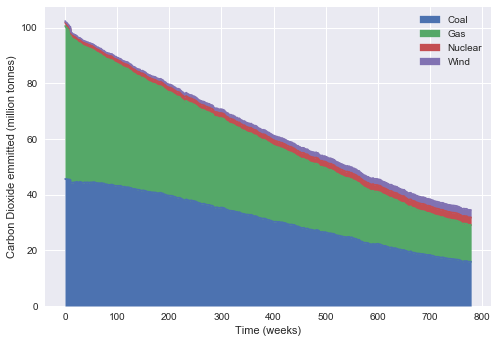

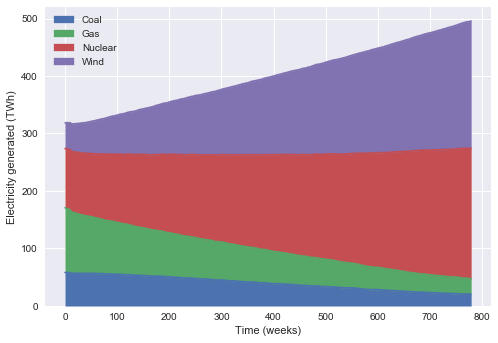

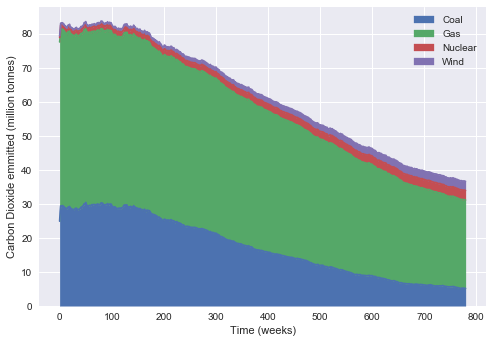

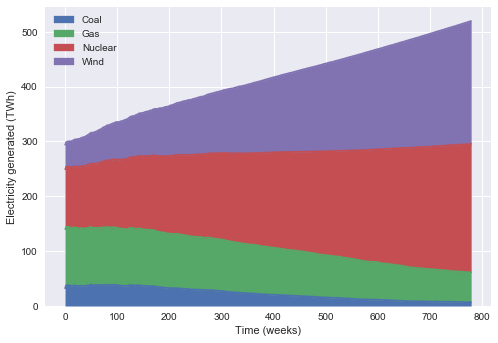

In [27]:
analysis.plotArea()
plt.show()

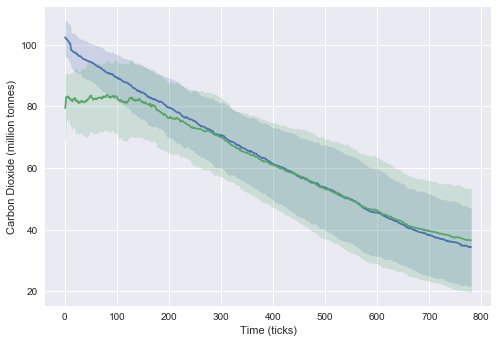

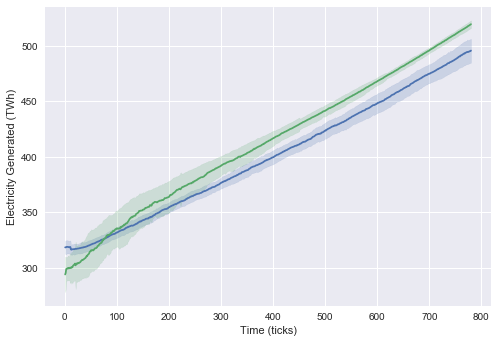

In [22]:
analysis.plotComparison()

## Presets:

| Name    | Origin                   | Coal  | Gas   | Nuclear | Wind  |
|---------|--------------------------|-------|-------|---------|-------|
| US-2007 | United States 2007 split | 0.49  | 0.22  | 0.19    | 0.08  |
| US-2020 | United States 2020 split | 0.197 | 0.406 | 0.197   | 0.198 |
| EU-2016 | European Union in 2016   | 0.206 | 0.221 | 0.304   | 0.269 |
| equal   | not applicable           | 0.25  | 0.25  | 0.25    | 0.25  |



## Cleanup

Leave uncommented to automatically remove the csvs on completion

In [23]:
! rm *.csv